In [8]:
import sys
sys.path.append("..")

In [9]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [10]:
paths = list(Path("../outputs/notebooks").glob("**/predictions_word/loss.csv"))
keys, dfs = [], []
for path in paths:
    dfs.append(pd.read_csv(path))
    keys.append((path.parents[2].stem, path.parents[1].stem))

loss_df = pd.concat(dfs, names=["model", "equivalence"], keys=keys)
loss_df

loss     idx  class  \
model   equivalence                                                 
w2v2_32 phoneme_within_word_prefix 0    -10.848471  278818  13181   
                                   1    -19.985394  254022   2507   
                                   2     -0.019179  488806   1162   
                                   3     -1.312825  499522   4569   
                                   4     -0.204772  416532     21   
...                                            ...     ...    ...   
w2v2_8  random                     8954  -1.284674  267556     44   
                                   8955   1.985010  296905     39   
                                   8956  -2.190716  465574      2   
                                   8957  -1.863454  457442     36   
                                   8958  -1.359045  123383     38   

                                                    class_label  word_length  
model   equivalence                                                           
w2v2_32 phoneme_within_word_prefix 0                     M AH D            3  
                                   1     D IH P AA R T M IH N T           10  
                                   2                      HH EY            2  
                                   3                      JH UW            2  
                                   4                          W            1  
...                                                         ...          ...  
w2v2_8  random                     8954                      IH            1  
                                   8955                    T IH            2  
                                   8956                      HH            1  
                                   8957                       M            1  
                                   8958                       T            1  

[62930 rows x 5 columns]

<Axes: xlabel='word_length', ylabel='Count'>

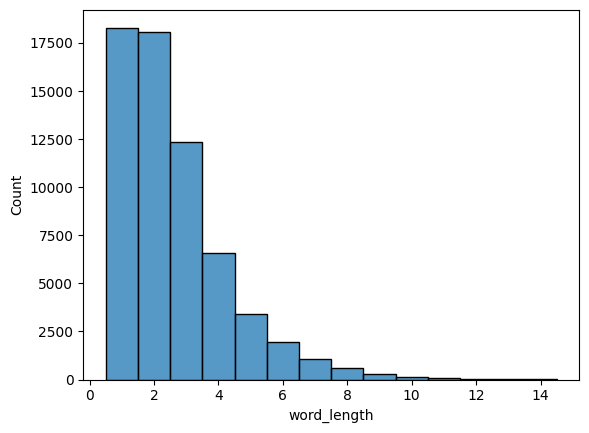

In [11]:
sns.histplot(loss_df.word_length, discrete=True)

Text(0.5, 0, 'Prefix length')

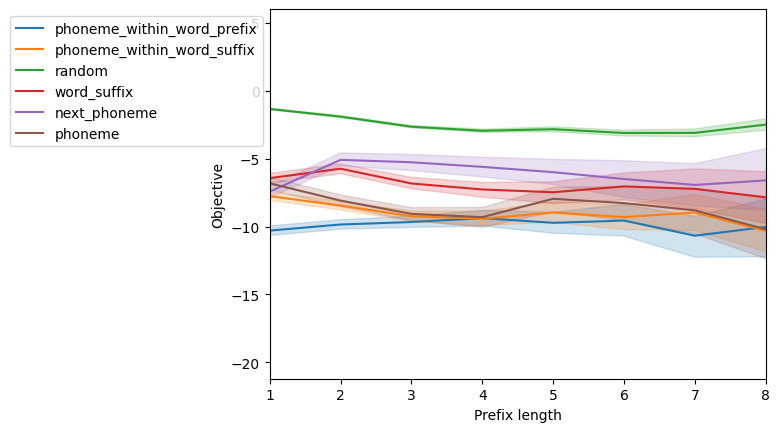

In [23]:
ax = sns.lineplot(data=loss_df.reset_index(), x="word_length", y="loss", hue="equivalence")
ax.set_xlim((1, 8))
ax.legend(loc="upper right", bbox_to_anchor=(0, 1))
ax.set_ylabel("Objective")
ax.set_xlabel("Prefix length")

<Axes: xlabel='phoneme_within_word_prefix', ylabel='phoneme'>

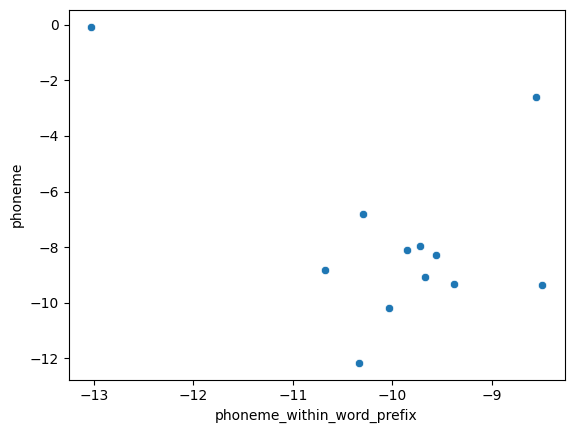

In [13]:
compare_pair = ["phoneme_within_word_prefix", "phoneme"]
paired_df = loss_df.loc[(slice(None), compare_pair), :].groupby(["equivalence", "word_length"]).loss.mean().reset_index() \
    .pivot(index=["word_length"], columns=["equivalence"], values=["loss"])
paired_df.columns = paired_df.columns.droplevel(0)
sns.scatterplot(data=paired_df, x=compare_pair[0], y=compare_pair[1])

<Axes: xlabel='phoneme_within_word_suffix', ylabel='phoneme'>

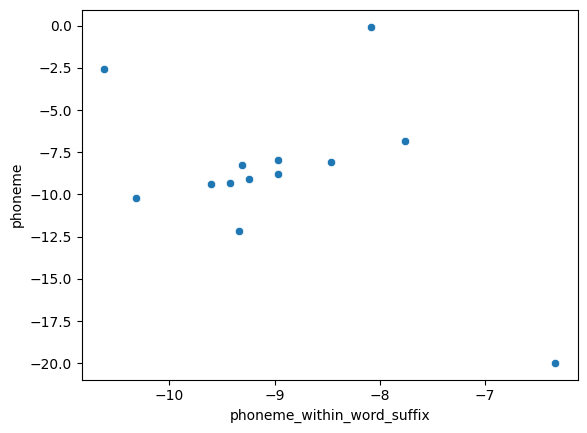

In [14]:
compare_pair = ["phoneme_within_word_suffix", "phoneme"]
paired_df = loss_df.loc[(slice(None), compare_pair), :].groupby(["equivalence", "word_length"]).loss.mean().reset_index() \
    .pivot(index=["word_length"], columns=["equivalence"], values=["loss"])
paired_df.columns = paired_df.columns.droplevel(0)
sns.scatterplot(data=paired_df, x=compare_pair[0], y=compare_pair[1])